<a href="https://colab.research.google.com/github/salma-abed/Deep-learning-based-automated-detection-and-classification-of-Alzheimer-s-disease-Using-Neuroimaging/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import nibabel as nib
import numpy as np
from google.colab import drive
import nibabel as nib
import matplotlib.pyplot as plt

In [ ]:
# mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class NiftiResizer:
    def __init__(self, root_folder, subfolder_names, new_shape):
        self.root_folder = root_folder
        self.subfolder_names = subfolder_names
        self.new_shape = new_shape 
        self.new_path = "/content/drive/MyDrive/resized_images" 
        self.images_after_resize = []
        self.labels = []

    def resize_images(self):
        if not os.path.exists(self.new_path): 
            os.makedirs(self.new_path)




        for subfolder_name in self.subfolder_names:
            subfolder_path = os.path.join(self.root_folder, subfolder_name)
            subfolder_new_path = os.path.join(self.new_path, subfolder_name)

            if not os.path.exists(subfolder_new_path): 
                os.makedirs(subfolder_new_path)


            else:
              print('These images are already resized')
            
            for filename in os.listdir(subfolder_path):
                if filename.endswith('.nii'):
                    input_path = os.path.join(subfolder_path, filename)
                    img = nib.load(input_path)
                    data = img.get_fdata()
                    resized_data = np.resize(data, self.new_shape)
                    resized_img = nib.Nifti1Image(resized_data, img.affine, img.header)
                    self.images_after_resize.append(resized_data)
                    self.labels.append(subfolder_name)

In [ ]:
import SimpleITK as sitk

In [ ]:
class NiftiDisplayer:
    def __init__(self, input_path):
        self.input_path = input_path
        
    def show_image(self):
        # img = nib.load(self.input_path)
        # data = img.get_fdata()
        img = sitk.ReadImage(self.input_path)
        data = sitk.GetArrayFromImage(img)


        if len(data.shape) == 2:
            # data = img.get_fdata()
            # middle_slice = data[:, :, data.shape[2]//2]
            # plt.imshow(middle_slice, cmap='gray')
            # plt.show()
            plt.imshow(data, cmap='gray')
            plt.show()

        else:
            fig, ax = plt.subplots(1, 3, figsize=(15,5))
            ax[0].imshow(data[:,:,data.shape[2]//2], cmap='gray')
            ax[1].imshow(data[:,data.shape[1]//2,:], cmap='gray')
            ax[2].imshow(data[data.shape[0]//2,:,:], cmap='gray')
            plt.show()

In [ ]:
# To call the resizer:
root_folder = '/content/drive/MyDrive/Model ADNI Dataset'
subfolder_names = ['AD', 'CN', 'LMCI', 'MCI']
new_shape = (256, 256, 256)

nifti_resizer = NiftiResizer(root_folder,subfolder_names,new_shape)
nifti_resizer.resize_images()

These images are already resized
These images are already resized
These images are already resized
These images are already resized


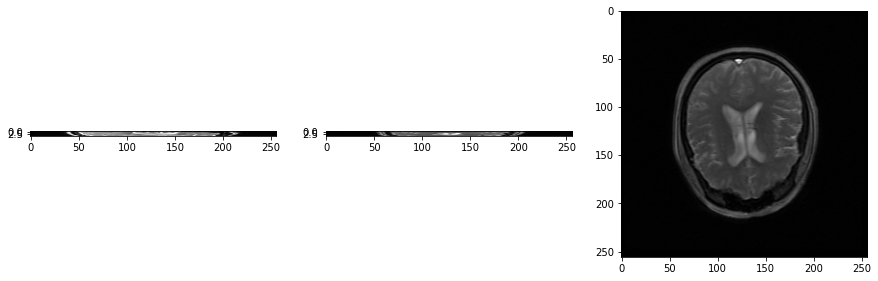

In [ ]:
# To display an image:

input_path = "/content/drive/MyDrive/Model ADNI Dataset/AD/ADNI_016_S_5251_MR_3_Plane_Localizer__br_raw_20130814141842736_1_S197574_I385042.nii"
nifti_displayer = NiftiDisplayer(input_path)
nifti_displayer.show_image()


# nifti_displayer_2 = NiftiDisplayer(input_path_2)

# nifti_displayer_2.show_image()

In [ ]:
img_1 = nib.load(input_path)
data = img_1.get_fdata()

print('Original Shape: ',data.shape)


img_1 = nib.load(input_path_2)
data_2 = img_1.get_fdata()

print('After resizing Shape: ',data_2.shape)

Original Shape:  (256, 256, 256)
After resizing Shape:  (192, 192, 1, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(images_after_resize, labels, test_size=0.2,stratify=labels,random_state=42)

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy
# Preprocess the data
images_after_resize = numpy.array(images_after_resize)
labels = numpy.array(labels)
images_after_resize = images_after_resize.astype('float32') / 255.
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(labels)

# Split the data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=(256, 256, 256)),
    keras.layers.MaxPool2D(pool_size=3, strides=2),
    keras.layers.Conv2D(256, 5, activation='relu'),
    keras.layers.MaxPool2D(pool_size=3, strides=2),
    keras.layers.Conv2D(384, 3, activation='relu'),
    keras.layers.Conv2D(384, 3, activation='relu'),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=3, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])



ValueError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 384)         1

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(images_after_resize,labels,epochs=5)

Epoch 1/5


ValueError: ignored